## Azure Machine Learning and R

### Setup
Before running through this notebook, make sure you have executed setup.R by running this in a terminal on the Notebook VM:

```shell
Rscript 0-setup.R
```


In [5]:
library(azuremlsdk)
library(data.table)
library(ggplot2)

In [6]:
ws = load_workspace_from_config()

In [7]:
attrition = ws$datasets$`IBM-Employee-Attrition`

In [8]:
mc = attrition$to_csv_files()$mount()

In [9]:
mc$start()
csv_file = paste(mc$mount_point, 'part-00000', sep = '/')
df = fread(file=csv_file)
mc$stop()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


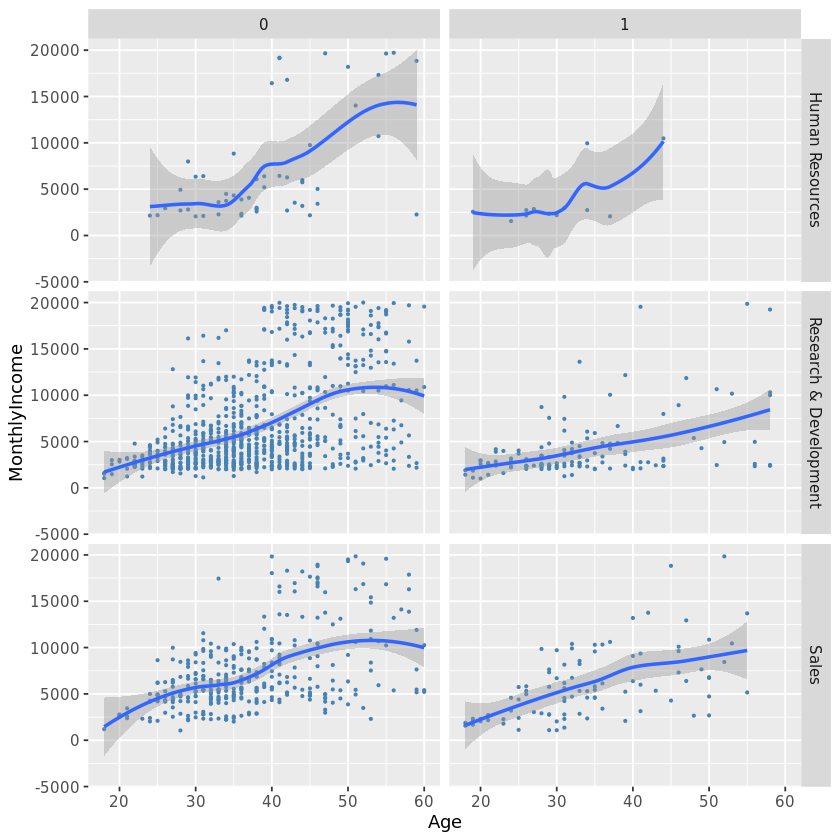

In [12]:
gg <- ggplot(df, aes(x=Age, y=MonthlyIncome))
gg = gg + geom_point(size=0.5, color='steelblue') 
gg = gg + geom_smooth(aes())
gg = gg + facet_grid(Department ~ Attrition) 
gg

In [58]:
names(df)

[1] "Age"                      "Attrition"               
 [3] "BusinessTravel"           "DailyRate"               
 [5] "Department"               "DistanceFromHome"        
 [7] "Education"                "EducationField"          
 [9] "EmployeeCount"            "EmployeeNumber"          
[11] "EnvironmentSatisfaction"  "Gender"                  
[13] "HourlyRate"               "JobInvolvement"          
[15] "JobLevel"                 "JobRole"                 
[17] "JobSatisfaction"          "MaritalStatus"           
[19] "MonthlyIncome"            "MonthlyRate"             
[21] "NumCompaniesWorked"       "Over18"                  
[23] "OverTime"                 "PercentSalaryHike"       
[25] "PerformanceRating"        "RelationshipSatisfaction"
[27] "StandardHours"            "StockOptionLevel"        
[29] "TotalWorkingYears"        "TrainingTimesLastYear"   
[31] "WorkLifeBalance"          "YearsAtCompany"          
[33] "YearsInCurrentRole"       "YearsSinceLastPromotion" 
[35] "YearsWithCurrManager"

## Now let's continue in R Studio 

There is an instance of R Studio Server running on your Notebook VM and the URL will be integrated into the AzureML studio by early November. For now, however, you need to construct the URL by hand. 

Just take the URL of your Notebook VM and add `-8787` behind the hostname. And strip the file name from the UEL, so you end up with something like this:

```
https://danielsc-8787.eastus2.notebooks.azureml.net
```

Once in R Studio, in the bottom right tab "Files" navigate to `cloudfiles/code/` and then where you cloned this repo to, for instance `cloudfiles/code/azureml-workshop-2019`